# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

#Converting dataset  into dataframe

bos = pd.DataFrame(boston.data)


In [2]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Data Pre-Processing

In [4]:
bos.shape

(506, 13)

In [5]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [6]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:

#Checking for null values if any
bos.isnull().values.any() 

False

# Data Visualization

In [8]:
#changing target variable name as #price

bos['Price']=boston.target

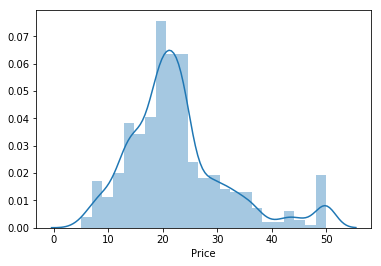

In [10]:
# We will try to understand distribution of target variable bos.Price
# Whether target variable has been normally distributed or not.
import seaborn as sns

sns.distplot(bos['Price'])

Upper figure shows the bos.Price has been normally distributed with some outliers.We can also conclude that maximum number of houses sold within price range of 20000 - 24000

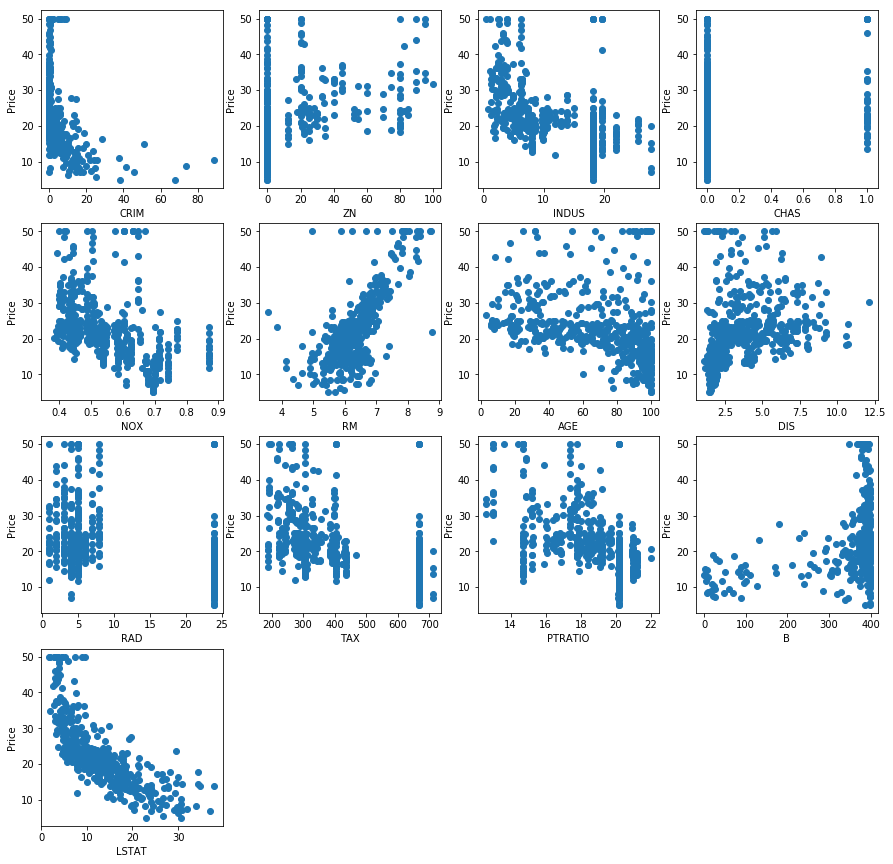

In [11]:
# plot each features with respect to target variable to see whether features has linear relationship with target variable or not.
plt.figure(figsize=(15, 15))

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
target = boston.target

for i, col in enumerate(features):
    plt.subplot(4, len(features)-9 , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.xlabel(col)
    plt.ylabel('Price')

If we will analyse above figures we can conclude that NOX , RM , DIS,LSTAT , AGE are showing near about linear character.Hence we can say that these features are too important for prediction of housing price.

Checking multicolinearity using heat map

a. As we know while solving linear regression problem each features should be independent with one another if there will be some correlation between two independent variables(Features) then it leads to overfitting the model so with the help of heat map we will eliminate all those features which shows strong correlation with one another.

b. We also try to extract all those features which will have extensive correlation with target variable. Because , if feature will be strongly correlated with target variables then we would expect better prediction.

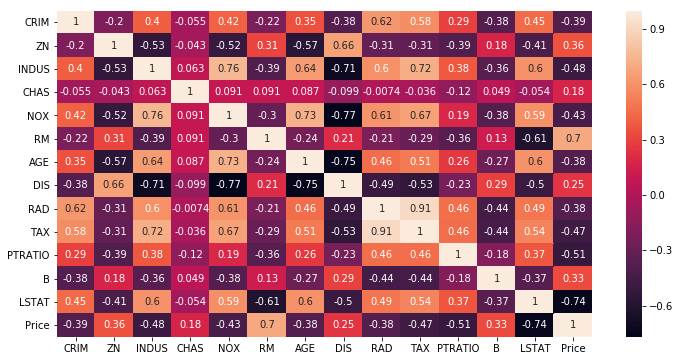

In [12]:
plt.figure(figsize=(12,6))
corr_val=bos.corr()
sns.heatmap(data=corr_val,annot=True)

In [13]:
#Extracting all those features which is highly correlated (threshold value=0.5) with target variable

def HighlyCorrelated(data,threshold):
    feature=[]
    values=[]
    for ele,index in enumerate(data.index):
        if abs(data[index])> threshold:
            feature.append(index)
            values.append(data[index])
    df=pd.DataFrame(data=values,index=feature,columns= ["Correlation"])
    return df

threshold=0.5
corr_df=HighlyCorrelated(corr_val.Price,threshold)
corr_df

,Correlation
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


Here RM , PTRATIO , LSTAT are highly correlated with target variable Price.Hence these variables will give better prediction.

In [27]:
# Creating Predictor variable 'X' and Target Variable 'y'
X = pd.DataFrame(bos.loc[:,["RM","LSTAT","PTRATIO"]])
Y = bos['Price']


In [28]:
#Splitting the dataset into training and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=100)

In [29]:
print(X_train.shape)
print(X_test.shape)

(354, 3)
(152, 3)


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg = LinearRegression()

In [32]:
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
y_train_pred = lin_reg.predict(X_train)

df1=pd.DataFrame({"Actual_train":Y_train,"Predicted_train":y_train_pred})
df2=df1.head()
df2

,Actual_train,Predicted_train
463,20.2,23.095520
75,21.4,24.263565
478,14.6,17.634043
199,34.9,31.193055
84,23.9,24.551500


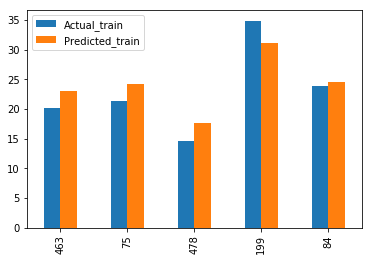

In [53]:
df2.plot(kind="bar")
plt.show()

In [54]:
coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
RM,4.354615
LSTAT,-0.521081
PTRATIO,-0.968722


In [55]:
#Prediction
pred = lin_reg.predict(X_test)
print(pred)

[35.68403644 29.38042889 21.23968667 18.96718589 20.69018408 27.40341699
 26.36782622 23.47682808 21.21584528 20.18663835 26.90052127 16.0580588
 22.14100938 17.15196267 37.63527836 27.72468407 30.36719371 16.90857423
 33.91986535 40.16371672 33.43976048 21.47099215 19.982056   18.06868458
 13.90989022 16.21326927 28.96734098 18.59737013 17.28259827 21.66301694
 16.64783735 22.78261779 38.38966642 24.90804135 29.90711906 30.49053434
 19.89722623 19.53706419 15.12714762 21.96917558 24.6423567  22.99198184
 17.07796848 23.65032286 29.7742048  28.8320534  18.91416102 18.61940545
 16.45408949 17.11772158 24.5446989  19.13867581 25.10416843 26.99744151
 10.21259253 13.5202855  29.61706871 31.49148059 13.06148634 22.25674163
 18.54706638 19.62667964 22.05643863 33.31986101 22.21078765 24.5187224
 16.19597034 30.14873027 19.51094842 22.40178213 17.61240812 18.46771133
  3.15609202 16.31227096 29.28260674 13.1028416  25.49356751 35.17065976
  9.9622534  25.77360989 34.41985231 39.32403227 14.2

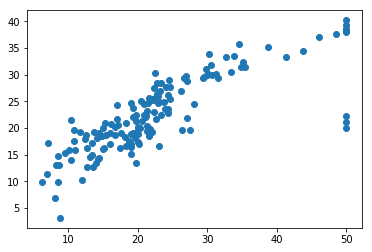

In [56]:
#Plotting Predictions
plt.scatter(Y_test,pred)

In [58]:
df3=pd.DataFrame({'Actual':Y_test, 'predicted':pred})
df4=df3.head(10)
df4

,Actual,predicted
198,34.6,35.684036
229,31.5,29.380429
502,20.6,21.239687
31,14.5,18.967186
315,16.2,20.690184
169,22.3,27.403417
111,22.8,26.367826
206,24.4,23.476828
108,19.8,21.215845
420,16.7,20.186638


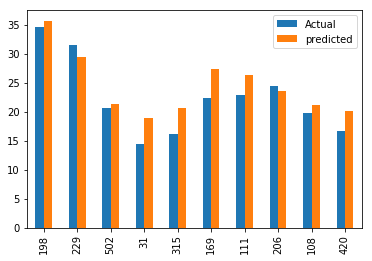

In [59]:
df4.plot(kind="bar")
plt.show()

From above figure we can see there is not much variation between predicted value and actual value hence we can say our predicted model insures that it will work well.

In [60]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [61]:
# Train Set Evaluation Metrics
print("MSE:",metrics.mean_squared_error(Y_train,y_train_pred))
print("MAE:",metrics.mean_absolute_error(Y_train,y_train_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_train,y_train_pred)))
print("R_squared:",r2_score(Y_train,y_train_pred))

MSE: 23.8946850390451
MAE: 3.528005597233019
RMSE: 4.888219004816079
R_squared: 0.6903303619701531


In [62]:
# Test Set Evaluation Metrics
print("MSE:",metrics.mean_squared_error(Y_test,pred))
print("MAE:",metrics.mean_absolute_error(Y_test,pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test,pred)))
print("R_squared:",r2_score(Y_test,pred))

MSE: 35.24035612196173
MAE: 3.871321540552555
RMSE: 5.936358826920904
R_squared: 0.6520672065112317


R Squared is nearer to 1 and there is not much difference between R squared value of Train set and Test set hence we can say model is not overfitted.